In [103]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import scipy
from networkx.algorithms import community
import itertools
%matplotlib inline

In [110]:
#NETWORK GENERATION based on number of modules and probability of inter/intramodular links
def create_modular_network(nodes,inter,intra,modules):
    network=nx.Graph()

    attr=dict()
    for i in range(nodes):
        network.add_node(i)
        nodeDict=dict()
        nodeDict["cluster"]=np.random.randint(modules)
        attr[i]=nodeDict

    nx.set_node_attributes(network,attr)


    for i in range(nodes):
        for j in range(nodes):
            x=np.random.uniform()
            if network.nodes[i]["cluster"]==network.nodes[j]["cluster"]: #test whether i an j are in the same cluster
                if x<intra:
                    network.add_edge(i,j)
            else:
                if x<inter:
                    network.add_edge(i,j)

    plt.figure(figsize=(5,5))
    nx.draw(network, node_size=15)

    print(nx.number_of_edges(network))

2664


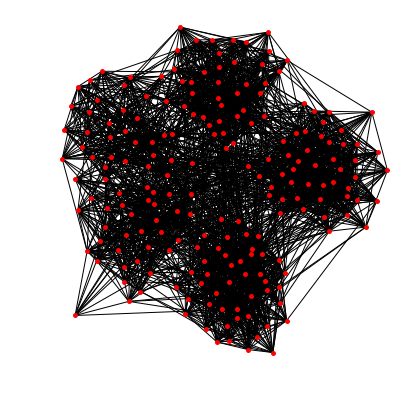

In [111]:
create_modular_network(200,0.02,0.3,5)

In [114]:
#COLOUR MAP FOR CLUSTERING COEFFICIENT OF NODES
def clustermap(network):
    color=[]
    for node in network.nodes():
        k=network.degree(node)
        kmax=(k*(k-1))/2
        links=0
        for neighbor in network.neighbors(node):
            for other in network.neighbors(node):
                if((neighbor,other)) in network.edges() and neighbor > other:
                    links+=1
        if kmax==0:
            clustering_coefficient=0
        else:
            clustering_coefficient=links/kmax
        
        network.nodes[node]["clustering_coefficient"]=clustering_coefficient
        color.append(clustering_coefficient)
    plt.figure(figsize=(5,5))
    nx.draw(network, node_size=100, node_color=color, colormap="RdYlGn")

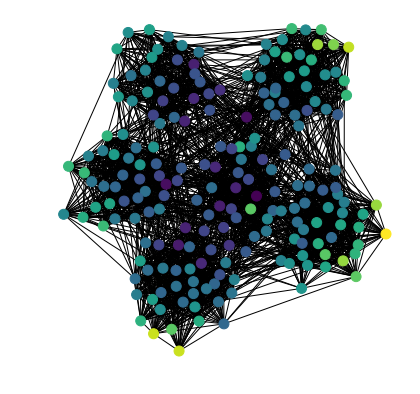

In [115]:
clustermap(network)

In [79]:
#TOIVONEN MODEL SOCIAL NETWORK
def newSocialNetwork(m0,mr,ms,Nmax,p):
    
    G = nx.erdos_renyi_graph(m0,p)
    N=m0
    #start with random network
    for i in range (Nmax-m0): #grow to desired size
        G.add_node(m0+i) 
        for node in G.nodes():
            x=np.random.rand()
            if x<=(mr/N): #probability of selecting a node as an initial contact
                G.add_edge(node,m0+i)
                for neighbor in G.neighbors(node): #probability of selecting the neighbour of an initial contact as a secondary contact
                    y=np.random.rand()
                    if y<=(ms/N):
                        G.add_edge(neighbor,m0+i)
        N=G.number_of_nodes()
        
        attr=dict()
        for node in G.nodes():
            nodeDict=dict()
            nodeDict["coop"]=float('%.0f' %np.random.rand())
            attr[node]=nodeDict
        
        nx.set_node_attributes(G, attr)
        
        attrEdge=dict()
        for edge in G.edges():
            edgeDict=dict()
            edgeDict["weight"]=float('%.3f' %np.random.rand()) #random sulyozas -> de ezt kesobb lehetne varialni...
            attrEdge[edge]=edgeDict
            
        nx.set_edge_attributes(G, attrEdge)
        
    return(G)

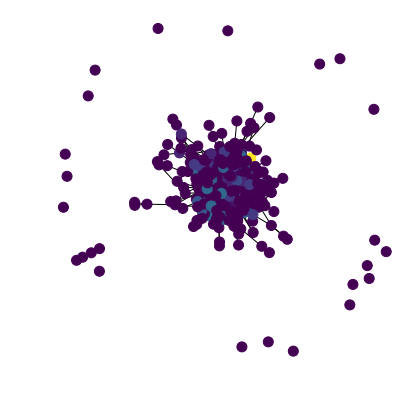

In [116]:
network2=newSocialNetwork(30,2,3,400,0.5)
clustermap(network2)

In [118]:
#MODULARITY, IF CLUSTERS ARE KNOWN (based on Newman's definition of such)
def modularity(network):
   
    m=len(network.edges()) #number of edges in network
    N=len(network.nodes()) #number of nodes in network
    partialsum=0
    for i in range(N):
        for j in range(N):
            if (i,j) in network.edges():
                A=1
            else:
                A=0
                
            if network.nodes[i]["cluster"]==network.nodes[j]["cluster"]:
                partialsum+=(A)-(((network.degree(i)*network.degree(j)))/(2*m))
    
    return partialsum/(2*m)

In [117]:
modularity(network)

0.613645122274768

In [126]:
#https://networkx.github.io/documentation/latest/reference/algorithms/generated/networkx.algorithms.community.centrality.girvan_newman.html
def modularize(network):
    communities_generator = community.girvan_newman(network)
    plt.figure(figsize=(5,5))
    nx.draw(network, node_size=15)
    
    comp = community.girvan_newman(network)
    for communities in itertools.islice(comp, 5):
        clusters=list(sorted(c) for c in communities)

    modulenumber=len(list(clusters))
    modulelist=list()
    
    for i in range(len(list(clusters))):
        modulelist.append(clusters[i])
    
    attr=dict()
    for i in range(modulenumber):
        for node in modulelist[i]:
            nodeDict=dict()
            nodeDict["cluster"]=i
            attr[node]=nodeDict

    nx.set_node_attributes(network,attr)
    print(modulenumber)
    #print(clusters)
    #print(attr)
    

27


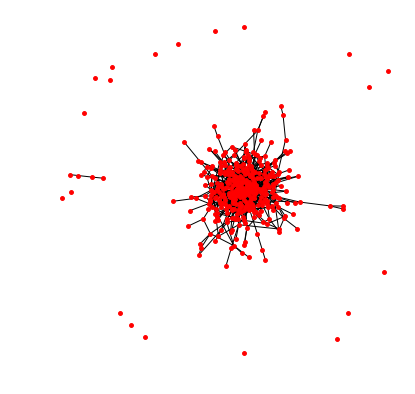

In [127]:
modularize(network2)

In [9]:
modularity(network)

0.587089300796117

In [10]:
modularity(network2)

0.04043537414963941

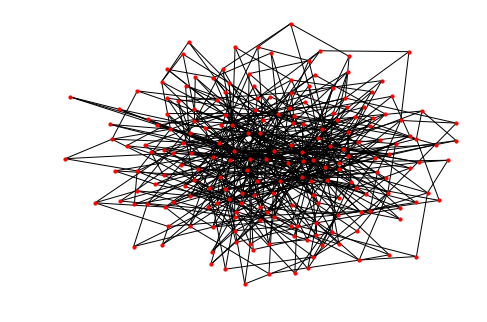

In [94]:
network3=nx.barabasi_albert_graph(200,3)
nx.draw(network3, node_size=10)

6


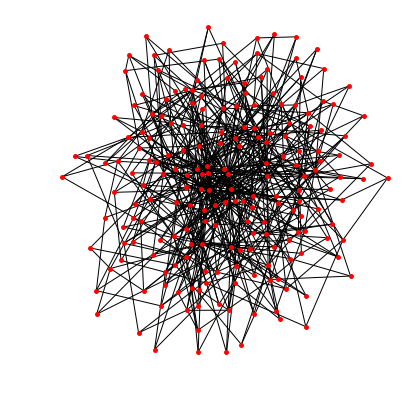

In [128]:
modularize(network3)

In [130]:
modularity(network3)

0.198065454462181

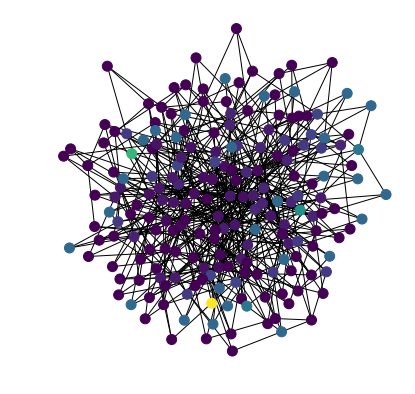

In [129]:
clustermap(network3)

In [74]:
#HUB IDENTIFICATION
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
def draw_hubs(G,percentile):
    degreelist=[]
    for node in G.nodes():
        degreelist.append((node,G.degree(node)))
    degreelist=sorted(degreelist, key=lambda x: x[1], reverse=True)

    
    cutoff=int(G.number_of_nodes()*(1-percentile))
    hubs=[n for (n,d) in degreelist[0:cutoff]]
    #print("Hubs:",hubs)

    attr=dict()
    for node in G.nodes():
        nodeDict=dict()
        if node in hubs:
            nodeDict["hub"]="1"
        else:
            nodeDict["hub"]="0"
        attr[node]=nodeDict
    nx.set_node_attributes(G,attr)

    color=[]
    for node in G.nodes():
        labels[node]=str(G.nodes[node]["hub"])
        color.append(G.nodes[node]["hub"])
    #print(labels)

    netLayout=nx.spring_layout(G)
    plt.figure(figsize=(10,10))
    nx.draw(G, netLayout,node_color=color, colormap="RdYlGn", node_size=100)
    plt.axis("equal")
    plt.show()

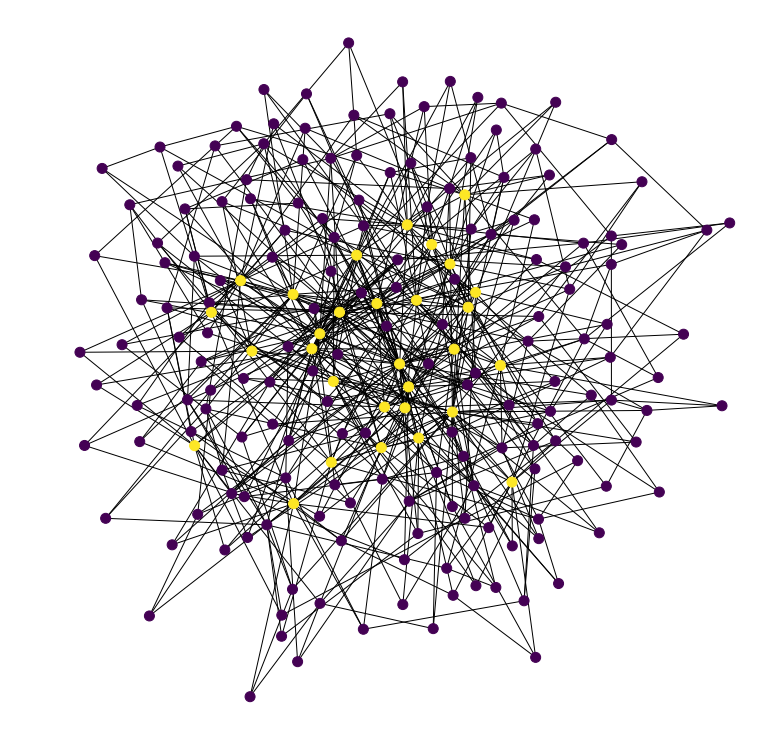

In [131]:
draw_hubs(network3,0.85)

In [ ]:
#networks with hubs in network perihpery
#core-periphery identification